In [3]:
using Revise, LazySets, Plots #, ReachabilityAnalysis

In [13]:
using LazySets: center
import LazySets.Arrays: _above

function _isupwards(vec)
    return vec[2] > 0 || (vec[2] == 0 && vec[1] > 0)
end

"""
    _upper_intersection(Z::AbstractZonotope, L::Line2D)

### Input

...

### Output

...

### Notes

We assume that the line `L` is of the form . . . , i.e. it is a vertical line.
"""
function _upper_intersection(Z::AbstractZonotope, L::Line2D;
                             check_intersection=true) # 8.2
    
    if check_intersection
        # check support func of Z is used
        is_intersection_empty(Z, L) && throw(ArgumentError("...."))
    end

    c = center(Z)
    P = copy(c)
    G = genmat(Z)
    r = ngens(Z)
    for i = 1:r
        gi = view(G, :, i)
        if !_isupwards(gi)
            gi .= -gi
        end
        P .= P - gi
    end
    G = sortslices(G, dims=2, by=x->atan(x[2], x[1])) # sort gens
    if P[1] < L.b
        G .= G[:,end:-1:1]
    end
    j = 1
    while isempty(intersection(LineSegment(P, P+2view(G, :, j)), L))
        P .= P + 2view(G, :, j)
        j += 1
    end
    vec = intersection(LineSegment(P, P+2view(G, :, j)), L)
    return vec
end

_upper_intersection

In [21]:
Z = rand(Zonotope, num_generators=10)
L = Line2D([0, 0.], [0, 1.])
i = _upper_intersection(Z, L)

Singleton{Float64,Array{Float64,1}}([-0.0, 9.97326186770523])

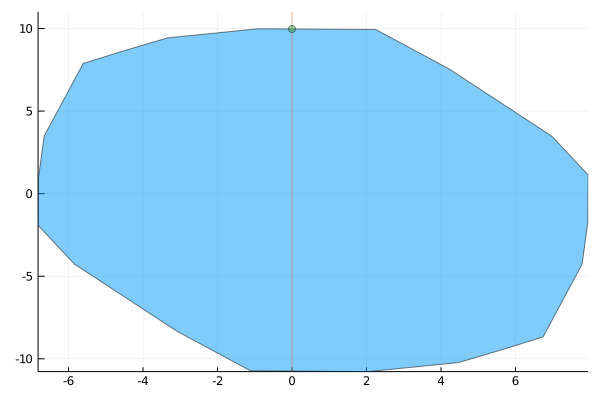

In [22]:
plot(Z)
plot!(L)
plot!(i)

In [23]:
i = _bound_intersection(Z, L)

Singleton{Float64,Array{Float64,1}}([-0.0, 9.97326186770523])

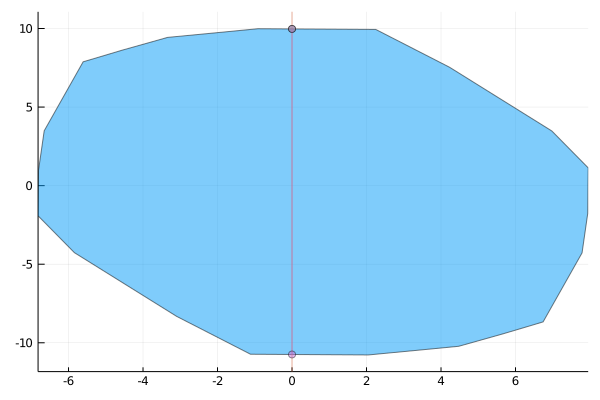

In [24]:
plot!(intersection(Z, L))

In [25]:
using BenchmarkTools

In [27]:
@btime intersection($Z, $L)

  386.180 μs (1649 allocations: 164.55 KiB)


HPolytope{Float64,Array{Float64,1}}(HalfSpace{Float64,Array{Float64,1}}[HalfSpace{Float64,Array{Float64,1}}([0.014502057507473834, 0.9998948396346737], 9.972213075843728), HalfSpace{Float64,Array{Float64,1}}([-0.014502057507473834, -0.9998948396346737], 10.74446031729846), HalfSpace{Float64,Array{Float64,1}}([1.0, 0.0], 0.0), HalfSpace{Float64,Array{Float64,1}}([-1.0, -0.0], -0.0)])

In [28]:
@btime _bound_intersection($Z, $L)

  52.922 μs (484 allocations: 41.59 KiB)


Singleton{Float64,Array{Float64,1}}([-0.0, 9.97326186770523])

----

In [33]:
using Optim

In [65]:
Z = rand(Zonotope, dim=2)
G = rand(Hyperplane, dim=2);

In [66]:
X = overapproximate(Z ∩ G, OctDirections)

HPolytope{Float64,Array{Float64,1}}(HalfSpace{Float64,Array{Float64,1}}[HalfSpace{Float64,Array{Float64,1}}([1.0, 1.0], -0.6666620087090112), HalfSpace{Float64,Array{Float64,1}}([1.0, -1.0], 2.2272236238988397), HalfSpace{Float64,Array{Float64,1}}([-1.0, 1.0], 0.5220738266145952), HalfSpace{Float64,Array{Float64,1}}([-1.0, -1.0], 1.6195582808197408), HalfSpace{Float64,Array{Float64,1}}([1.0, 0.0], 0.7802808074905222), HalfSpace{Float64,Array{Float64,1}}([0.0, 1.0], -0.5487422127740275), HalfSpace{Float64,Array{Float64,1}}([0.0, -1.0], 1.4469428178380621), HalfSpace{Float64,Array{Float64,1}}([-1.0, 0.0], 1.070816052945307)])

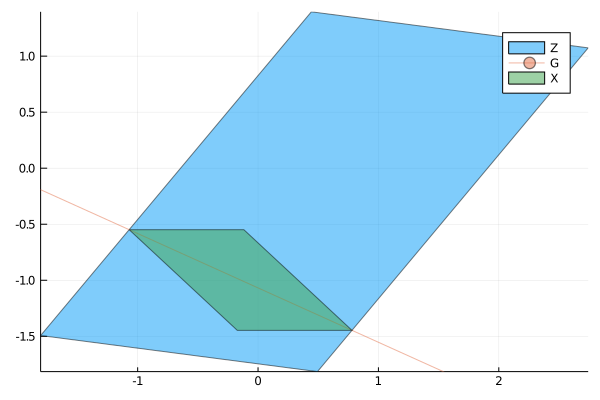

In [67]:
plot(Z, lab="Z")
plot!(G, lab="G")
plot!(X, lab="X")

In [68]:
R = overapproximate(X, Zonotope, OctDirections(2))

Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([-0.14526762229405848, -0.9978425153060447], [-5.551115123125783e-17 0.4491003025320173 0.4764481288910922 0.0; -5.551115123125783e-17 -0.4491003025320173 0.0 0.0])

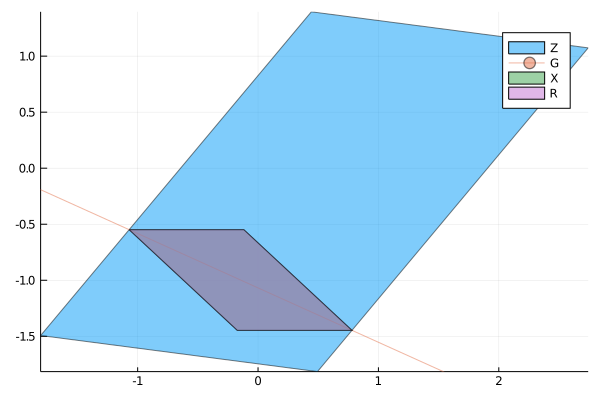

In [69]:
plot!(R, lab="R")